### Задание 1


Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [38]:
boston = load_boston()

In [39]:
data = boston["data"]
target = boston["target"]

In [40]:
feature_names = boston["feature_names"]

In [41]:
x = pd.DataFrame(data, columns = feature_names)

y = pd.DataFrame(target,columns = ['price'])

In [42]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [49]:
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [50]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

x_train_tsne = tsne.fit_transform(x_train_scaled)

print('До:\t{}'.format(x_train_scaled.shape))
print('После:\t{}'.format(x_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


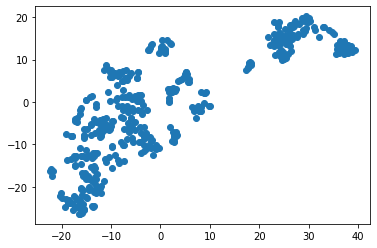

In [51]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма x_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


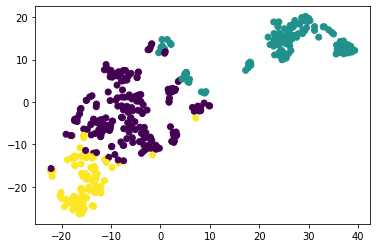

In [54]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(x_train_scaled)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

plt.show()

#### Вычислите средние значения CRIM в разных кластерах.

In [55]:
print('Кластер 0: {}'.format(x_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(x_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(x_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


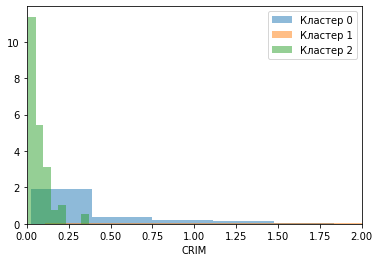

In [80]:
plt.hist(x_train.loc[labels_train == 0, 'CRIM'], bins=8, density=True, alpha=0.5)
plt.hist(x_train.loc[labels_train == 1, 'CRIM'], bins=8, density=True, alpha=0.5)
plt.hist(x_train.loc[labels_train == 2, 'CRIM'], bins=8, density=True, alpha=0.5)

plt.xlim(0, 2)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

#### Вычислите средние значения price в разных кластерах.

In [72]:
y_train.mean()

price    22.796535
dtype: float64

In [73]:
y_train[labels_train == 0].mean()


price    24.958115
dtype: float64

In [70]:
y_train[labels_train == 1].mean()


price    16.165354
dtype: float64

In [71]:
y_train[labels_train == 2].mean()

price    27.788372
dtype: float64

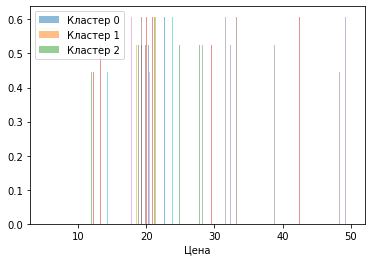

In [79]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [81]:
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [83]:
tsne_test = TSNE(n_components=2, learning_rate=250, random_state=42)

x_test_tsne = tsne.fit_transform(x_test_scaled)

print('До:\t{}'.format(x_test_scaled.shape))
print('После:\t{}'.format(x_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


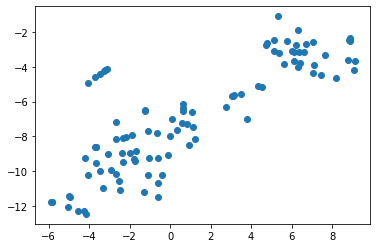

In [84]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1])

plt.show()

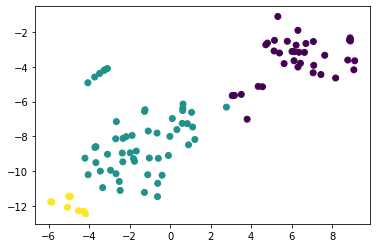

In [86]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_test = kmeans.fit_predict(x_test_scaled)

plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=labels_test)

plt.show()

#### Вычислите средние значения price в разных кластерах на тестовых данных.

In [87]:
y_test.mean()

price    21.488235
dtype: float64

In [88]:
y_test[labels_test == 0].mean()

price    16.710526
dtype: float64

In [89]:
y_test[labels_test == 1].mean()

price    22.690909
dtype: float64

In [90]:
y_test[labels_test == 2].mean()

price    34.311111
dtype: float64

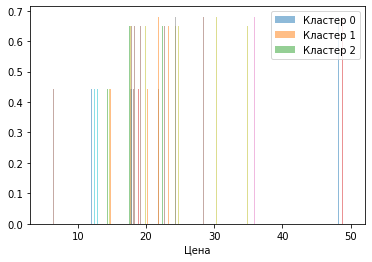

In [91]:
plt.hist(y_test[labels_test == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[labels_test == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

#### Вычислите средние значения CRIM в разных кластерах на тестовых данных.

In [92]:
print('Кластер 0: {}'.format(x_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(x_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(x_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 9.419181842105264
Кластер 1: 0.21929690909090907
Кластер 2: 0.04070333333333334


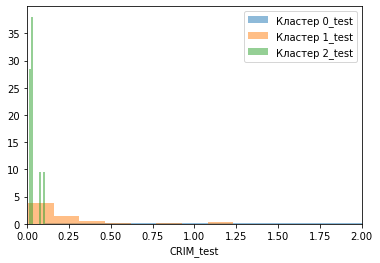

In [93]:
plt.hist(x_test.loc[labels_test == 0, 'CRIM'], bins=8, density=True, alpha=0.5)
plt.hist(x_test.loc[labels_test == 1, 'CRIM'], bins=8, density=True, alpha=0.5)
plt.hist(x_test.loc[labels_test == 2, 'CRIM'], bins=8, density=True, alpha=0.5)

plt.xlim(0, 2)
plt.legend(['Кластер 0_test', 'Кластер 1_test', 'Кластер 2_test'])
plt.xlabel('CRIM_test')

plt.show()